WORD EMBEDDING CON GENSIM

Gensim es una librería que permite entrenar y manejar word embeddings de forma sencilla (entre otras funcionalidades relacionadas con el mundo NLP). Su principal ventaja está en que todo su código está escrito en C y permite entrenar grandes modelos en un tiempo muy reducido.

In [1]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Descarga de un modelo preentrenado

Gensim incluye una api que permite descargar un modelo word2vec preentrenado.

In [3]:
import gensim.downloader as api

In [4]:
we_model = api.load('glove-wiki-gigaword-300') # Vectors of size 300

[==================================================] 100.0% 376.1/376.1MB downloaded


A partir de una palabra, podemos obtener su vector facilmente como si el objeto fuese un diccionario de python.

In [8]:
len(we_model["king"])

300

In [9]:
we_model["king"]

array([ 0.0033901, -0.34614  ,  0.28144  ,  0.48382  ,  0.59469  ,
        0.012965 ,  0.53982  ,  0.48233  ,  0.21463  , -1.0249   ,
       -0.34788  , -0.79001  , -0.15084  ,  0.61374  ,  0.042811 ,
        0.19323  ,  0.25462  ,  0.32528  ,  0.05698  ,  0.063253 ,
       -0.49439  ,  0.47337  , -0.16761  ,  0.045594 ,  0.30451  ,
       -0.35416  , -0.34583  , -0.20118  ,  0.25511  ,  0.091111 ,
        0.014651 , -0.017541 , -0.23854  ,  0.48215  , -0.9145   ,
       -0.36235  ,  0.34736  ,  0.028639 , -0.027065 , -0.036481 ,
       -0.067391 , -0.23452  , -0.13772  ,  0.33951  ,  0.13415  ,
       -0.1342   ,  0.47856  , -0.1842   ,  0.10705  , -0.45834  ,
       -0.36085  , -0.22595  ,  0.32881  , -0.13643  ,  0.23128  ,
        0.34269  ,  0.42344  ,  0.47057  ,  0.479    ,  0.074639 ,
        0.3344   ,  0.10714  , -0.13289  ,  0.58734  ,  0.38616  ,
       -0.52238  , -0.22028  , -0.072322 ,  0.32269  ,  0.44226  ,
       -0.037382 ,  0.18324  ,  0.058082 ,  0.26938  ,  0.3620

# Palabras más cercanas

Dada una palabra, podemos obtener otras con semántica relacionada.

In [10]:
we_model.most_similar("king")

[('queen', 0.6336469054222107),
 ('prince', 0.6196622848510742),
 ('monarch', 0.5899620652198792),
 ('kingdom', 0.5791266560554504),
 ('throne', 0.5606487989425659),
 ('ii', 0.5562329292297363),
 ('iii', 0.5503199100494385),
 ('crown', 0.5224862694740295),
 ('reign', 0.5217353701591492),
 ('kings', 0.5066401958465576)]

In [11]:
we_model.most_similar("clooney")

[('soderbergh', 0.5675532817840576),
 ('dicaprio', 0.5522417426109314),
 ('hanks', 0.5262142419815063),
 ('affleck', 0.5230436325073242),
 ('aniston', 0.5075886845588684),
 ('kidman', 0.5035362839698792),
 ('streep', 0.4983142018318176),
 ('starring', 0.48904356360435486),
 ('pitt', 0.4850562512874603),
 ('wahlberg', 0.4840816557407379)]

# Representación gráfica de palabras

Vamos a tomar varios tipos de palabras y calculamos sus vectores para después representarlos graficamente.

In [12]:
dict_words = {"fruits": ["apple", "banana", "grapes", "pear"],
"countries" : ["spain", "france", "germany", "russia"],
"capitals": ["madrid", "paris", "london"]}

In [13]:
words = []
labels = []
for cat, w in dict_words.items():
  words += w
  labels += [cat] * len(w)

In [14]:
vectors = we_model[words]

In [15]:
vectors_2D = PCA(2).fit_transform(vectors)

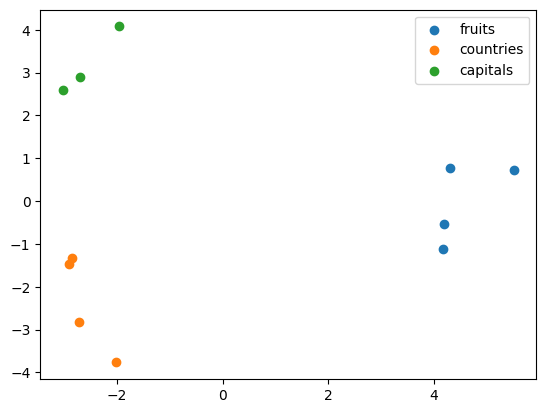

In [16]:
for cat in dict_words.keys():
  indices_cat = [i for i in range(len(labels)) if labels[i] == cat]
  plt.scatter(vectors_2D[indices_cat, 0], vectors_2D[indices_cat, 1], label=cat)
plt.legend()

# Analogias

Podemos resolver analogías con los vectores.

## Capitales

Relaciones como


París es a Francia como Madrid es a ...



Llamemos al vector v[Francia] - v[Paris] el vector "dar capital".

Si le sumamos ese vector a Madrid, deberíamos obtener su país. Por lo tanto, calculamos:

v[Madrid] + v[Francia] - v[Paris]

In [17]:
we_model.most_similar(positive=["madrid", "france"], negative=["paris"])

[('spain', 0.7692385911941528),
 ('valencia', 0.5684594511985779),
 ('spanish', 0.5646007657051086),
 ('barcelona', 0.563834011554718),
 ('argentina', 0.5396186113357544),
 ('portugal', 0.5387835502624512),
 ('sevilla', 0.5046040415763855),
 ('italy', 0.5028786659240723),
 ('zidane', 0.4995364546775818),
 ('morocco', 0.49710702896118164)]

In [18]:
we_model.most_similar(positive=["london", "france"], negative=["paris"])

[('britain', 0.7673851251602173),
 ('england', 0.6279441714286804),
 ('uk', 0.6197735071182251),
 ('british', 0.6013829708099365),
 ('ireland', 0.5365166068077087),
 ('u.k.', 0.5294836759567261),
 ('scotland', 0.5195811986923218),
 ('australia', 0.5150106549263),
 ('wales', 0.5144591331481934),
 ('europe', 0.5047693848609924)]

## Cambio de género

niño es a niña como rey es a ...

In [19]:
we_model.most_similar(positive=["king", "girl"], negative=["boy"])

[('queen', 0.6850624084472656),
 ('monarch', 0.5474709272384644),
 ('prince', 0.5421635508537292),
 ('princess', 0.5402387976646423),
 ('kingdom', 0.5332470536231995),
 ('crown', 0.5044780373573303),
 ('throne', 0.5016161799430847),
 ('elizabeth', 0.47261184453964233),
 ('reign', 0.45861828327178955),
 ('royal', 0.45636385679244995)]

In [20]:
we_model.most_similar(positive=["actor", "girl"], negative=["boy"])

[('actress', 0.8573834896087646),
 ('actors', 0.6476327776908875),
 ('starring', 0.646539032459259),
 ('actresses', 0.6383243203163147),
 ('starred', 0.6281569600105286),
 ('comedian', 0.5822998285293579),
 ('screenwriter', 0.5753825902938843),
 ('film', 0.571474015712738),
 ('movie', 0.562624454498291),
 ('comedy', 0.548316240310669)]

## Verbos

Corriendo es a correr como leyendo es a ...

In [21]:
we_model.most_similar(positive=["reading", "run"], negative=["running"])

[('read', 0.5900884866714478),
 ('write', 0.4339434802532196),
 ('writing', 0.407512903213501),
 ('english', 0.40743592381477356),
 ('graders', 0.40681830048561096),
 ('books', 0.4061349034309387),
 ('book', 0.40353184938430786),
 ('learning', 0.3981004059314728),
 ('math', 0.3952794671058655),
 ('gave', 0.3910830318927765)]

## Animales

Leon es a mamífero como serpiente es a ...

In [22]:
we_model.most_similar(positive=["snake", "mammal"], negative=["lion"])

[('reptile', 0.5321832895278931),
 ('reptiles', 0.5299293994903564),
 ('mammals', 0.49863043427467346),
 ('amphibians', 0.4949932098388672),
 ('species', 0.4843510687351227),
 ('vertebrates', 0.47551417350769043),
 ('snakes', 0.47244492173194885),
 ('colubrid', 0.4697336256504059),
 ('fishes', 0.463002473115921),
 ('genus', 0.45274412631988525)]

## Otras relaciones


Comida es a hambre como agua es a ...

In [23]:
we_model.most_similar(positive=["hungry", "water"], negative=["food"])

[('thirsty', 0.5533702969551086),
 ('pumped', 0.4412654638290405),
 ('suck', 0.42335474491119385),
 ('drained', 0.39843064546585083),
 ('stream', 0.39652135968208313),
 ('river', 0.39231249690055847),
 ('reservoirs', 0.38666486740112305),
 ('reservoir', 0.38598597049713135),
 ('pumping', 0.38306713104248047),
 ('polluted', 0.37656158208847046)]

Bueno es a delfín como malo es a ...

In [24]:
we_model.most_similar(positive=["dolphin", "bad"], negative=["good"])

[('whale', 0.5005789995193481),
 ('bottlenose', 0.48540300130844116),
 ('shark', 0.4427964389324188),
 ('humpback', 0.4312136471271515),
 ('porpoise', 0.42933523654937744),
 ('whales', 0.4154546856880188),
 ('dolphins', 0.4044915437698364),
 ('orca', 0.3846529722213745),
 ('tursiops', 0.3542860150337219),
 ('beached', 0.35057365894317627)]

Planta es a verde como cielo es a ...

In [25]:
we_model.most_similar(positive=["sky", "green"], negative=["plants"])

[('blue', 0.5189551115036011),
 ('bright', 0.47260040044784546),
 ('dark', 0.4636498987674713),
 ('red', 0.4485243856906891),
 ('purple', 0.40362274646759033),
 ('black', 0.3992920517921448),
 ('brown', 0.3935820460319519),
 ('skies', 0.39106622338294983),
 ('yellow', 0.39066290855407715),
 ('orange', 0.3683398962020874)]

Otras cosas curiosas ...

In [ ]:
we_model.most_similar(positive=["water", "charmander"], negative=["fire"])

[('squirtle', 0.42119091749191284),
 ('desalinating', 0.40751805901527405),
 ('effluent', 0.39918598532676697),
 ('milfoil', 0.3938579857349396),
 ('eddying', 0.3922502398490906),
 ('kamandalu', 0.3917728662490845),
 ('nutrient-rich', 0.38724076747894287),
 ('trihydrate', 0.38471049070358276),
 ('karkheh', 0.38469383120536804),
 ('bulbasaur', 0.3841511309146881)]

# Entrenamiento

Descargamos un corpus de textos usando la propia api. Vamos a entrenar nuestro propio word2vec usando estos textos.

In [26]:
import gensim.downloader as api
data_texts = api.load('text8')

[==================================================] 100.0% 31.6/31.6MB downloaded


In [27]:
for t in list(data_texts)[0:3]:
    print(" ".join(t))
    print("=================================")

anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst the term is still used in a pejorative way to describe any act that used violent means to destroy the organization of society it has also been taken up as a positive label by self defined anarchists the word anarchism is derived from the greek without archons ruler chief king anarchism as a political philosophy is the belief that rulers are unnecessary and should be abolished although there are differing interpretations of what this means anarchism also refers to related social movements that advocate the elimination of authoritarian institutions particularly the state the word anarchy as most anarchists use it does not imply chaos nihilism or anomie but rather a harmonious anti authoritarian society in place of what are regarded as authoritarian political structures and coercive economic institutio

In [28]:
we_model = Word2Vec(sentences=data_texts, vector_size=50, window=4, min_count=10)

In [29]:
we_model.wv.most_similar("king")

[('prince', 0.8544808626174927),
 ('emperor', 0.792422354221344),
 ('queen', 0.7739709615707397),
 ('viii', 0.7638453245162964),
 ('throne', 0.7551888227462769),
 ('aragon', 0.754790186882019),
 ('empress', 0.7536682486534119),
 ('constantine', 0.7519286274909973),
 ('elizabeth', 0.7443940043449402),
 ('castile', 0.7414368391036987)]